In [ ]:
## IMPORT CSV FILE
## df_pop is the name of the imported file
## pandas is now pd

In [3]:
import pandas as pd

# Read CSV file, skipping first 5 rows, using row 6 as header, and handling comma as thousands separator
df_pop = pd.read_csv(
    'mapdatadownload.csv',
    skiprows=5,        # Skip first 5 rows. Wnhy?
    thousands=',',     # Interpret commas as thousands separators
    header=0,           # After skipping, the first row becomes the header
    encoding='latin1' 
)

print(df_pop.head())

   Area code          Area name Area type  Population 2011  Population 2021  \
0  K04000001  England and Wales  National       56075912.0       59597542.0   
1  E92000001            England   Country       53012456.0       56490048.0   
2  W92000004              Wales   Country        3063456.0        3107494.0   
3  E12000001         North East    Region        2596886.0        2647013.0   
4  E12000002         North West    Region        7052177.0        7417397.0   

   Percentage change  
0                6.3  
1                6.6  
2                1.4  
3                1.9  
4                5.2  


In [4]:
## SEE SOME OF THE ROWS
## head() is a function, so it needs ()

In [5]:
df_pop.head()

,Area code,Area name,Area type,Population 2011,Population 2021,Percentage change
0,K04000001,England and Wales,National,56075912.0,59597542.0,6.3
1,E92000001,England,Country,53012456.0,56490048.0,6.6
2,W92000004,Wales,Country,3063456.0,3107494.0,1.4
3,E12000001,North East,Region,2596886.0,2647013.0,1.9
4,E12000002,North West,Region,7052177.0,7417397.0,5.2


In [6]:
## WHICH COLUMNS ARE THERE?
## columns is an attribute and "list" give us a list

In [7]:
list(df_pop.columns)

['Area code',
 'Area name',
 'Area type',
 'Population 2011',
 'Population 2021',
 'Percentage change']

In [8]:
## BLANCK SPACES -> _
## .str.replace() replace something in the text
## r'\s+' regex means blank spaces
    ## r means raw atring
    ## \s means blank space
    ## + means more than one
## '_' to replace with
## regex=True to treat regex as a pattern, no just one case

In [9]:
df_pop.columns = df_pop.columns.str.replace(r'\s+', '_', regex=True)
print(list(df_pop.columns)) # check again

['Area_code', 'Area_name', 'Area_type', 'Population_2011', 'Population_2021', 'Percentage_change']


In [10]:
## HOW MANY ROWS AND COLUMNS?
## f allows {} to be replace for variables, expressions o functions

In [11]:
rows, cols = df_pop.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 369, Columns: 6


In [12]:
## CHECK THE AREA_TYPE COLUMN
## .value_counts() is also a function

In [13]:
print(df_pop.Area_type.value_counts())

Area_type
Local Authority    355
Region               9
Country              2
National             1
Name: count, dtype: int64


In [14]:
## FOCUS ON LOCAL AUTHORITY
## df_pop_la is a new variable
## df_pop['Area_type'] == 'Local Authority' selects this condition
## df_pop[...] is a boolean where area_type == local authority is true

In [15]:
df_pop_la = df_pop[df_pop['Area_type'] == 'Local Authority']

In [ ]:
## OVERVIEW OF THE COLUMNS
## INFO COUNTS NON-NULL COUNTS
## DESCRIBE COUNTS NUMERIC DATA

In [15]:
print(df_pop_la.info())
print(df_pop_la.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 12 to 366
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area_code          355 non-null    object 
 1   Area_name          355 non-null    object 
 2   Area_type          355 non-null    object 
 3   Population_2011    355 non-null    float64
 4   Population_2021    355 non-null    float64
 5   Percentage_change  355 non-null    float64
dtypes: float64(3), object(3)
memory usage: 19.4+ KB
None
       Population_2011  Population_2021  Percentage_change
count     3.550000e+02     3.550000e+02         355.000000
mean      2.132867e+05     2.268876e+05           6.070423
std       2.099628e+05     2.245442e+05           4.608338
min       2.203000e+03     2.054000e+03          -9.600000
25%       1.000530e+05     1.055705e+05           2.950000
50%       1.382650e+05     1.477760e+05           5.800000
75%       2.487865e+05     2.628895e+05      

In [ ]:
## MAXIMUM POPULATION SIZE IN 2021?
## df_pop_la['Population_2021'] to focus un that column
## .max(skipna=True) to ignore NA o NULL values

In [16]:
print("Max population: ", df_pop_la['Population_2021'].max(skipna=True))

Max population:  1576069.0


In [16]:
## WHICH LAs HAVE THE MAXIMUM POPULATION SIZE
## df_pop_la.loc[ ... , 'Area_name'] select the column 'Area_name' for ... this condition
    ## .loc localize label
    ## df_pop_la['Population_2021'] == df_pop_la['Population_2021'].max(skipna=True) this is the condition
## df_pop_la['Population_2021'].max(skipna=True)) for the number

In [17]:
print("{} have the maximum population of {}".format(
    ", ".join(df_pop_la.loc[df_pop_la['Population_2021'] == df_pop_la['Population_2021'].max(skipna=True), 'Area_name']), 
    df_pop_la['Population_2021'].max(skipna=True))
    )

Kent have the maximum population of 1576069.0


In [ ]:
## WHICH LAs HAVE THE MINIMUN POPULATION SIZE

In [18]:
print("{} have the minimum population of {}".format(
    ", ".join(df_pop_la.loc[df_pop_la['Population_2021'] == df_pop_la['Population_2021'].min(skipna=True), 'Area_name']), 
    df_pop_la['Population_2021'].min(skipna=True))
    )

Isles of Scilly have the minimum population of 2054.0


In [ ]:
## STANDAR DEVIATION

In [19]:
df_pop_la.describe()

,Population_2011,Population_2021,Percentage_change
count,3.550000e+02,3.550000e+02,355.000000
mean,2.132867e+05,2.268876e+05,6.070423
std,2.099628e+05,2.245442e+05,4.608338
min,2.203000e+03,2.054000e+03,-9.600000
25%,1.000530e+05,1.055705e+05,2.950000
50%,1.382650e+05,1.477760e+05,5.800000
75%,2.487865e+05,2.628895e+05,9.000000
max,1.463740e+06,1.576069e+06,22.100000


In [20]:
std_dev = df_pop_la['Population_2021'].std()
# plain notation
print("The standard deviation of Population_2021 is: {}".format(std_dev)) 
# scientific notation
print("Using scientific notation: {:.3e}".format(std_dev)) 
# thousands separator notation + 2 decimal places
print("Using thousands separator notation: {:,.2f}".format(std_dev))

The standard deviation of Population_2021 is: 224544.20636612535
Using scientific notation: 2.245e+05
Using thousands separator notation: 224,544.21


In [ ]:
## NULL VALUES OR OUTLIERS??

In [21]:
# Calculate Q1, Q3, and IQR
Q1 = df_pop_la['Population_2021'].quantile(0.25)
Q3 = df_pop_la['Population_2021'].quantile(0.75)
IQR = Q3 - Q1

# Tukey's fences
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_pop_la[
    (df_pop_la['Population_2021'] < lower_bound) |
    (df_pop_la['Population_2021'] > upper_bound)
]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("How many outliers?", outliers.shape[0])
print("Outliers:\n", outliers)

Lower bound: -130408.0
Upper bound: 498868.0
How many outliers? 33
Outliers:
      Area_code        Area_name        Area_type  Population_2011  \
56   E06000047    County Durham  Local Authority         513242.0   
60   E06000052         Cornwall  Local Authority         532273.0   
62   E06000054        Wiltshire  Local Authority         470981.0   
68   E06000060  Buckinghamshire  Local Authority         505283.0   
254  E08000003       Manchester  Local Authority         503127.0   
270  E08000019        Sheffield  Local Authority         552698.0   
275  E08000025       Birmingham  Local Authority        1073045.0   
282  E08000032         Bradford  Local Authority         522452.0   
285  E08000035            Leeds  Local Authority         751485.0   
321  E10000003   Cambridgeshire  Local Authority         621210.0   
322  E10000006          Cumbria  Local Authority         499858.0   
323  E10000007       Derbyshire  Local Authority         769686.0   
324  E10000008           

In [ ]:
$$ CREATE A BOXPLOT

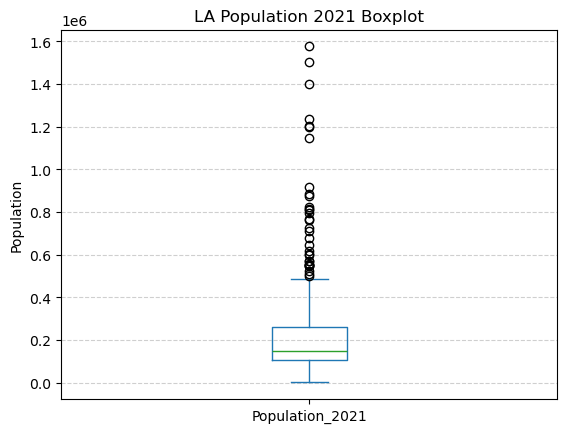

In [22]:
import matplotlib.pyplot as plt

# Create boxplot
df_pop_la['Population_2021'].plot(kind='box', title='LA Population 2021 Boxplot')

plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
################################PRACTICE

In [ ]:
# Which LAs experienced the largest population percentage change? To what extent?

In [23]:
print("{} have the largest population percentage change of {}%".format(
    ", ".join(df_pop_la.loc[df_pop_la['Percentage_change'] == df_pop_la['Percentage_change'].max(skipna=True), 'Area_name']), 
    df_pop_la['Percentage_change'].max(skipna=True))
    )

Tower Hamlets have the largest population percentage change of 22.1%


In [ ]:
# Which LAs experienced the smallest population percentage change? To what extent?

In [25]:
print("{} have the smallest population percentage change of {}%".format(
    ", ".join(df_pop_la.loc[df_pop_la['Percentage_change'] == df_pop_la['Percentage_change'].min(skipna=True), 'Area_name']), 
    df_pop_la['Percentage_change'].min(skipna=True))
    )

Kensington and Chelsea have the smallest population percentage change of -9.6%


In [ ]:
# Making a boxplot of Percentage_change

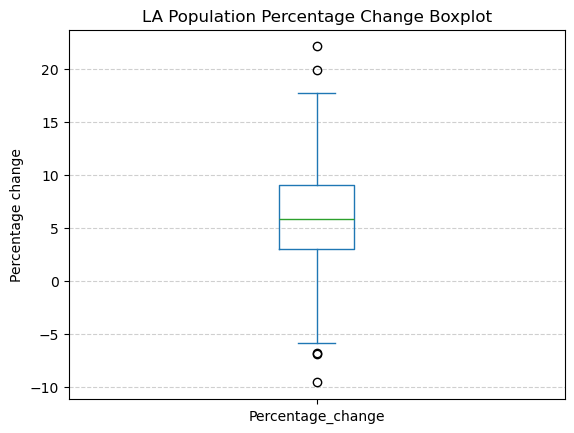

In [27]:
import matplotlib.pyplot as plt

# Create boxplot
df_pop_la['Percentage_change'].plot(kind='box', title='LA Population Percentage Change Boxplot')

plt.ylabel('Percentage change')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()